In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from sklearn.model_selection import train_test_split
from textblob import TextBlob

# Set seaborn style for better visuals
sns.set(style="whitegrid")


In [ ]:
# Importing the required packages
from nltk.stem.cistem import Cistem
import pandas as pd
import numpy as np
from nltk.tokenize import sent_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
# Importing Sci-kit learn functions for evaluation and dataset analysis purpose
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score, f1_score
import re

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
header_list = ["text_id","text","task_1","task_2"]

# Reading the train german data
Corpus = pd.read_csv("/content/drive/MyDrive/Disseration UoN/Datasets/german_train.tsv",encoding='latin-1', sep="\t",names=header_list)
Corpus['text'].dropna(inplace=True)
Corpus['text'] = [entry.lower() for entry in Corpus['text']]

# Keeping only text data and removing special characters
Corpus['text'] = [re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', entry) for entry in Corpus['text']]
Corpus['text'] = [entry.replace(".", " ") for entry in Corpus['text']]
Corpus['text']= [sent_tokenize(entry, language='german') for entry in Corpus['text']]

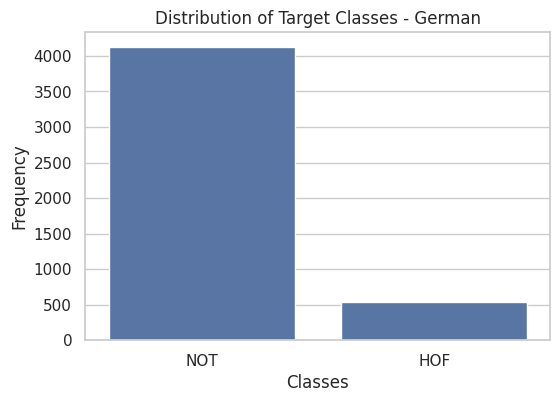

In [ ]:
# Analyze Target Distribution

# Plot the target distribution
def plot_class_distribution(df, language):
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x='task_1')
    plt.title(f'Distribution of Target Classes - {language}')
    plt.xlabel('Classes')
    plt.ylabel('Frequency')
    plt.show()

plot_class_distribution(Corpus, "German")


In [ ]:
Corpus['text'] = Corpus['text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

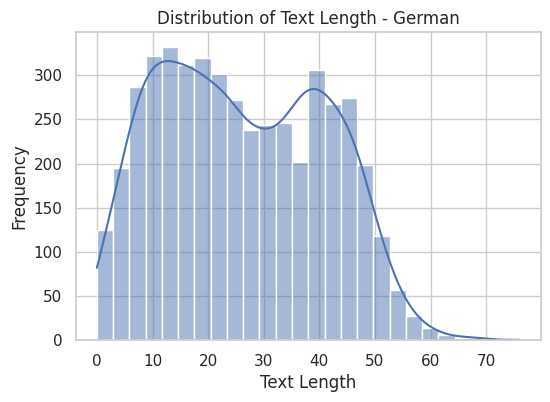

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

# Ploting text length distribution
def plot_text_length_distribution(df, language):
    text_lengths = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
    plt.figure(figsize=(6, 4))
    sns.histplot(text_lengths, kde=True)
    plt.title(f'Distribution of Text Length - {language}')
    plt.xlabel('Text Length')
    plt.ylabel('Frequency')
    plt.show()

# Apply the function
plot_text_length_distribution(Corpus, "German")


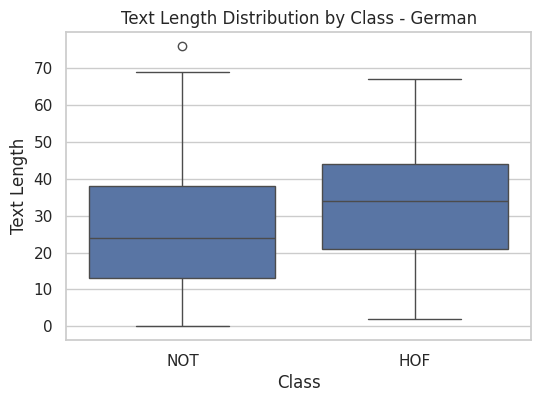

In [ ]:
# Ploting the text length distribution by class
def plot_text_length_by_class(df, language):
    df['text_length'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='task_1', y='text_length')
    plt.title(f'Text Length Distribution by Class - {language}')
    plt.xlabel('Class')
    plt.ylabel('Text Length')
    plt.show()

# Apply the function
plot_text_length_by_class(Corpus, "German")


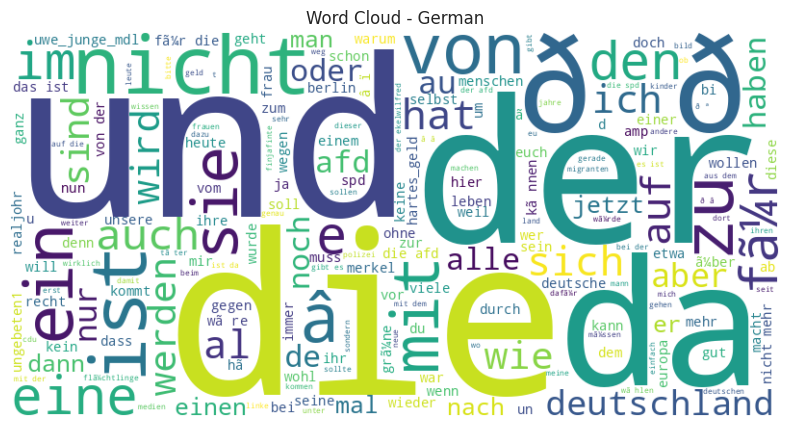

In [ ]:
# Ploting the word cloud
from wordcloud import WordCloud

def generate_word_cloud(df, language):
    text = ' '.join(df['text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud - {language}')
    plt.show()

# Apply the function
generate_word_cloud(Corpus, "German")


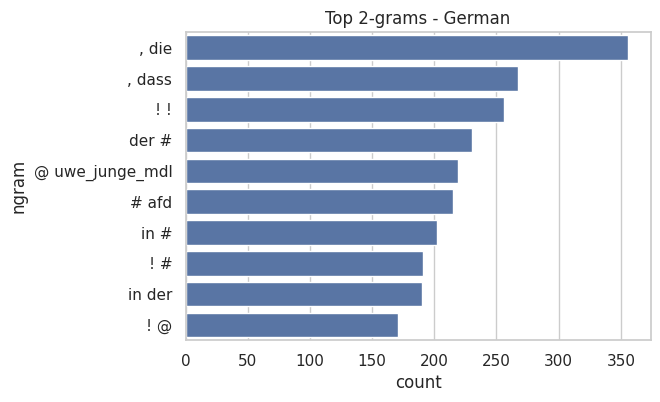

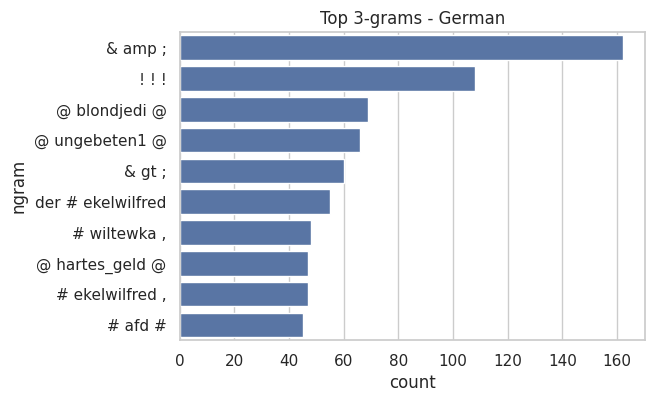

In [ ]:
from nltk import ngrams
from collections import Counter
import pandas as pd

def get_ngrams(text, n=2):
    tokens = nltk.word_tokenize(text)
    n_grams = list(ngrams(tokens, n))
    return n_grams

# Plotting n-grams
def plot_ngrams(df, language, n=2):
    all_text = ' '.join(df['text'])
    ngrams_list = get_ngrams(all_text, n)
    ngrams_freq = Counter(ngrams_list).most_common(10)

    ngrams_df = pd.DataFrame(ngrams_freq, columns=['ngram', 'count'])
    ngrams_df['ngram'] = ngrams_df['ngram'].apply(lambda x: ' '.join(x))

    plt.figure(figsize=(6, 4))
    sns.barplot(x='count', y='ngram', data=ngrams_df)
    plt.title(f'Top {n}-grams - {language}')
    plt.show()

# Apply the function for bigrams and trigrams
plot_ngrams(Corpus, "German", n=2)  # Bigrams
plot_ngrams(Corpus, "German", n=3)  # Trigrams
